
Fa: the average increase in the total test error : 
4.9999999999999826e-05

Fb: the variance of each feature on the test set :
 [0.0, 0.0, 9.222222222222221, 36.5, 3.888888888888889, 22.38888888888889, 0.3541666666666667, 0.0, 0.0, 1.2222222222222219, 38.90972222222222, 25.6875, 11.805555555555555, 6.576388888888889, 3.8541666666666665, 0.0, 0.0, 5.1875, 42.57638888888889, 17.409722222222218, 59.24305555555555, 4.409722222222222, 14.076388888888891, 0.0, 0.0, 8.722222222222221, 6.472222222222222, 44.1875, 62.22222222222222, 14.576388888888888, 11.25, 0.0, 0.0, 9.354166666666666, 33.30555555555555, 27.576388888888886, 60.743055555555564, 15.576388888888888, 14.354166666666666, 0.0, 0.0, 5.576388888888888, 52.72222222222222, 19.909722222222225, 54.90972222222221, 13.25, 14.576388888888886, 0.0, 0.0, 1.4166666666666667, 43.40972222222223, 25.25, 11.020833333333334, 8.38888888888889, 4.138888888888888, 0.0, 0.0, 0.0, 12.243055555555557, 29.1875, 3.1875, 23.555555555555554, 1.2430555555555

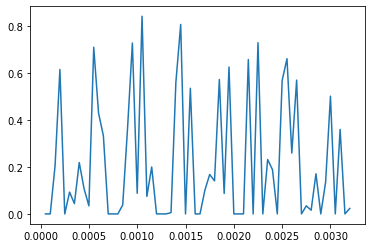

In [35]:
import numpy as np 
import random
import math
from sklearn.feature_selection import mutual_info_regression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt

def import_data(filename, delimiter):
    training_data = list()
    with open(filename) as tr:
        read_data = tr.read()
        for row in read_data.split("\n"):
            training_data.append(row.split(delimiter))
    training_data = training_data[:len(training_data)-1]
    # print(str(len(training_data)))
    return training_data

def filter_0_and_1(training_data):
    training_data_class_0_and_1_64 = list()
    training_data_classes_64 = list()
    features = random.randint(50, 64)
    for i in range(0, len(training_data[features-50:features])):
        if(training_data[i][len(training_data[i])-1] == '0'):
            training_data_class_0_and_1_64.append(training_data[i][:len(training_data[i])-1])
            training_data_classes_64.append(training_data[i][len(training_data[i])-1])
        elif (training_data[i][len(training_data[i])-1] == '1'):
            training_data_class_0_and_1_64.append(training_data[i][:len(training_data[i])-1])
            training_data_classes_64.append(training_data[i][len(training_data[i])-1])
    return (training_data_class_0_and_1_64, training_data_classes_64 )

def sigmoid(x):
  return 1/(1+np.exp(-x))

def logistic_regression(X, Y, learning_rate):
    W = list()
    delta_w = list()
    o = 0.0
    r = list()
    error = list()
    square_error = list()
    for i in range(len(Y)):
        r.append(Y[i])
    for i in range(len(X[0])):
        W.append(random.uniform(-0.01,0.01))
        delta_w.append(0)
        error.append(0.0)
        square_error.append(0.0)
    for i in range(len(Y)):
        o = 0
        for j in range(len(X[0])):
            o = o + W[j]*float(X[i][j])
        y = sigmoid(o)
        delta_w[j] += (float(r[i])-y)*float(X[i][j])
        square_error[j] += (float(r[i])-y) * (float(r[i])-y)
    for j in range(len(X[0])):
        W[j] += learning_rate * delta_w[j]
        error[j] = math.sqrt(square_error[j]/62)
    return error

def logistic_regression_with_zero_weight(X, Y, learning_rate):
    W = list()
    delta_w = list()
    o = 0.0
    r = list()
    error = list()
    square_error = list()
    for i in range(len(Y)):
        r.append(Y[i])
    for i in range(len(X[0])):
        W.append(0)
        delta_w.append(0)
        error.append(0.0)
        square_error.append(0.0)
    for i in range(len(Y)):
        o = 0
        for j in range(len(X[0])):
            o = o + W[j]*float(X[i][j])
        y = sigmoid(o)
        delta_w[j] += (float(r[i])-y)*float(X[i][j])
        square_error[j] += (float(r[i])-y) * (float(r[i])-y)
    for j in range(len(X[0])):
        W[j] += learning_rate * delta_w[j]
        error[j] = math.sqrt(square_error[j]/62)
    return error

def variance(X):
    var = list()
    for i in range(len(X[0])):
        var.append(np.var(X[:,i]))
    return var    

training_data = import_data('optdigits.tra', "\t")
testing_data = import_data('optdigits.tes', "\t")

training_data_class_0_and_1_500_64, training_data_classes_500_64 = filter_0_and_1(training_data)
testing_data_class_0_and_1_500_64, testing_data_classes_500_64 = filter_0_and_1(testing_data)

learning_rates = [0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0] 
test_erros_over_10_runs = list()
test_erros_over_10_runs_with_zero_weight = list()
for learning_rate in learning_rates:
    error = logistic_regression(testing_data_class_0_and_1_500_64, testing_data_classes_500_64, learning_rate)
    test_erros_over_10_runs.append("{:.4f}".format(sum(error)/len(error)))
#     print("mean testing error : " +  str("{:.4f}".format(sum(error)/len(error))))



errors = list()
for learning_rate in learning_rates:
    error = logistic_regression_with_zero_weight(testing_data_class_0_and_1_500_64, testing_data_classes_500_64, learning_rate)
    test_erros_over_10_runs_with_zero_weight.append("{:.4f}".format(sum(error)/len(error)))
#     print("mean testing error with zero weight: " +  str("{:.4f}".format(sum(error)/len(error))))
    errors.append(error)
increase = np.array(test_erros_over_10_runs_with_zero_weight).astype(float) - np.array(test_erros_over_10_runs).astype(float)
print("\nFa: the average increase in the total test error : \n" + str(np.mean(increase)))

mean_increase = np.mean(increase)
increase_list = list()
for i in range(64):
    increase_list.append(mean_increase * (i+1))
feature_wise_avg_error = list()
errors_array = np.array(errors).astype(float)
for i in range(len(errors[0])):
    feature_wise_avg_error.append(sum(errors_array[:,i])/len(errors_array[:,i]))
# print("\nFa: feature_wise_avg_error : " + str(feature_wise_avg_error))

var = variance(np.array(testing_data_class_0_and_1_500_64).astype(float))
print("\nFb: the variance of each feature on the test set :\n " + str(var))

m = mutual_info_regression(testing_data_class_0_and_1_500_64, testing_data_classes_500_64)
print("\nFc: the mutual information between the feature column and the label column :\n " + str(m.tolist()))

# plt.plot(increase_list, var)
plt.plot(increase_list, m)